# Correlation json

In [644]:
import json
import glob
from collections import Counter
import datetime
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [401]:
def jread(fn):
    with open(fn, 'r',encoding='utf8') as f:
        data = f.read()
    r = []
    tmp = data.split('}{"created_at":')
    for j in tmp[1:-1]:
        r.append(json.loads('{"created_at":'+j+'}'))
    r.append(json.loads('{"created_at":'+tmp[-1]))
    return [json.loads(tmp[0]+'}')]+r

In [402]:
pths = glob.glob('tweet_data/*.json')
# +glob.glob('tweet_data/tweets/*/*.json')

In [403]:
all_data = []

In [404]:
for p in pths:
    r = jread(p)
    all_data = all_data+r

# POI tweets

# Helper functions

In [336]:
def normalize(df):
    for c in df.columns:
        min_max_scaler = preprocessing.MinMaxScaler()
        x = getattr(df, c).values.reshape(-1,1)
        x_scaled = min_max_scaler.fit_transform(x).reshape(-1)
        setattr(df,c,x_scaled)
    return df

In [412]:
tkns = {'#prayforitaly', 'pandemic', '#indiawillwin', 'states', 'mani', 'place:b850c1bfd38f30e0', 'zona', 'covid', '@narendramodi', '@cartabellotta', '#covidstopswithme', '@covidnewsbymib', 'usa', 'per', 'le', 'sanità', '#alwayswearfacecover', '#arrestidomiciliari', '@robersperanza', 'governo', '#governogiallorosso', '#unlock4.0', 'lavaggio', '#wearamask', '#coronarvirusitalia', '#giuseppeconte', 'quarantine', '#iorestoacasa', '#unlock4', '@drharshvardhan', '#unlock', '@mohfw_india', 'india', '#governodellavergogna', '3.0', 'policy', 'until:2020-09-19', 'bjp', 'government', '@matteorenzi', 'facecover', 'integrazione', '#italiacoronavirus', 'place:96683cc9126741d1', '#togetheragainstcovid19', 'baarat', 'mask', '-rt', '#unlock3.0', 'amministrazione', '#stayhomesavelives', 'disinfettante', 'cassa', 'lockdown', '@giuseppeconteit', 'unlock-4', '#covid2019', 'confinamento', '#distanzasociale', '4.0', 'guadagni', 'hindusthan', 'contagi', '#covid19italia', '#stayhomechallenge', '@matteosalvinimi', 'संगरोध', '#covid19news', 'facemask', '#covid19', 'administration', '#covid2020', 'america', 'italia', '@ministerosalute', '#lockdown', 'us', 'united', 'covid19', 'rossa', '#unlock3', 'politica', '#covidmask', 'भारत', 'coronavirus', 'covid-19', 'mascherina', 'लॉकडाउन', '#italiazonarossa', 'ministero', '#mascherine', '#indiafightscorona', '#missionbeginagain', '#staysafe', 'unlock', 'unlock-3', '#italylockdown', '#masks4all'}

In [91]:
poi_tweets = []
for i in all_data:
    if i['poi_id']:
        poi_tweets.append(i)

In [414]:
poi_tweet_date_count = {}

for i in poi_tweets:
    country = i['country']
    if country not in poi_tweet_date_count:
        poi_tweet_date_count[country] = {}
    if i['poi_name'] not in poi_tweet_date_count[country]:
        poi_tweet_date_count[country][i['poi_name']]= {}
        
    date = datetime.datetime.strptime(i['created_at'], '%a %b %d %H:%M:%S +0000 %Y')
    if str(date.date()) not in poi_tweet_date_count[country][i['poi_name']]:
        poi_tweet_date_count[country][i['poi_name']][str(date.date())] = []
        
    poi_tweet_date_count[country][i['poi_name']][str(date.date())].append((i['full_text'], i['tweet_lang']))

In [ ]:
# # poi_tweet_date_count = {}
# poi_tweet_date_covid_count = {}

# for i in poi_tweets:
#     country = i['country']
#     if country not in poi_tweet_date_covid_count:
#         poi_tweet_date_covid_count[country] = {}
#     if i['poi_name'] not in poi_tweet_date_covid_count[country]:
#         poi_tweet_date_covid_count[country][i['poi_name']]= {}
        
#     date = datetime.datetime.strptime(i['created_at'], '%a %b %d %H:%M:%S +0000 %Y')
#     if str(date.date()) not in poi_tweet_date_covid_count[country][i['poi_name']]:
#         poi_tweet_date_covid_count[country][i['poi_name']][str(date.date())] = []
#     if len(set(i['full_text'].lower().split()).intersection(tkns))>0:
#         poi_tweet_date_covid_count[country][i['poi_name']][str(date.date())].append((i['full_text'], i['tweet_lang']))

In [ ]:
poi_tweet_date_data = {}
all_dates = []
for c, v in poi_tweet_date_count.copy().items():
    for p, pv in v.items():
        if p not in poi_tweet_date_data:
            poi_tweet_date_data[p] = {}
        for d in pv:
            all_dates.append(d)
            poi_tweet_date_data[p][d]  = len(poi_tweet_date_count[c][p][d])

In [415]:
# poi_tweet_date_data = {}
# all_dates = []
# for c, v in poi_tweet_date_covid_count.copy().items():
#     for p, pv in v.items():
#         if p not in poi_tweet_date_data:
#             poi_tweet_date_data[p] = {}
#         for d in pv:
#             all_dates.append(d)
#             poi_tweet_date_data[p][d]  = len(poi_tweet_date_covid_count[c][p][d])

In [416]:
all_dates = sorted(list(set(all_dates)))

In [ ]:
df = pd.DataFrame.from_dict(poi_tweet_date_data)
df.index = pd.to_datetime(df.index)
# df.plot(figsize=(16,8))
df.index = df.index.set_names('date')

In [421]:
covid = pd.read_csv('owid-covid-data.csv')
covid.date = pd.to_datetime(covid.date)
in_covid = covid[covid.location.apply(lambda x: x=='India')][['date', 'location', 'new_cases']]
it_covid = covid[covid.location.apply(lambda x: x=='Italy')][['date', 'location', 'new_cases']]
us_covid = covid[covid.location.apply(lambda x: x=='United States')][['date', 'location', 'new_cases']]
in_covid = in_covid.set_index('date')
it_covid = it_covid.set_index('date')
us_covid = us_covid.set_index('date')

In [422]:
in_corr = in_covid.merge(df[['drharshvardhan', 'narendramodi', 'MoHFW_INDIA']], how='outer', left_index=True, right_index=True).fillna(0)
it_corr = it_covid.merge(df[['MinisteroSalute', 'Cartabellotta', 'matteorenzi', 'matteosalvinimi']], how='outer', left_index=True, right_index=True).fillna(0)
us_corr = us_covid.merge(df[['Surgeon_General', 'CDCgov', 'NYGovCuomo']], how='outer', left_index=True, right_index=True).fillna(0)
# threshold the dates
in_corr = normalize(in_corr[(in_corr.index>=pd.to_datetime('2020-07-15')) & (in_corr.index<=pd.to_datetime('2020-09-21'))][in_corr.columns[1:]])
it_corr = normalize(it_corr[(it_corr.index>=pd.to_datetime('2020-07-15')) & (it_corr.index<=pd.to_datetime('2020-09-21'))][it_corr.columns[1:]])
us_corr = normalize(us_corr[(us_corr.index>=pd.to_datetime('2020-07-15')) & (us_corr.index<=pd.to_datetime('2020-09-21'))][us_corr.columns[1:]])

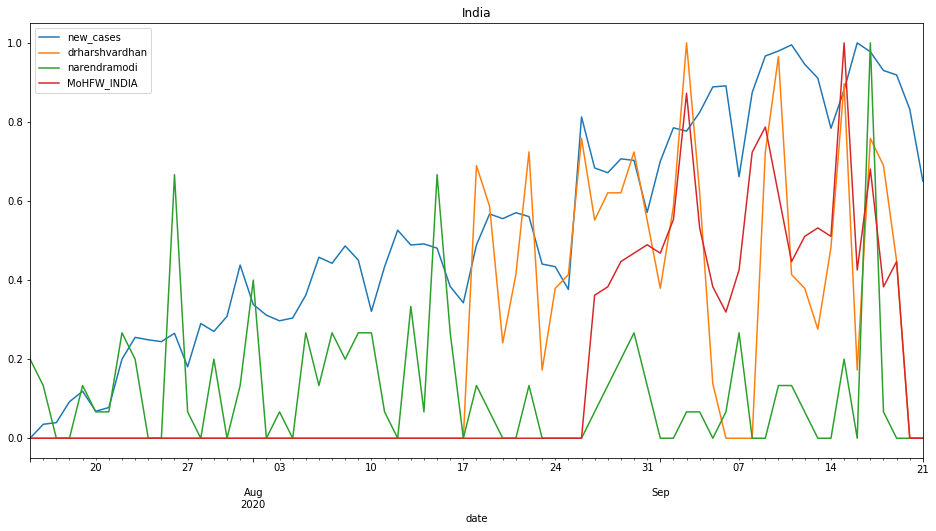

In [432]:
in_corr.plot(figsize=(16,8), title='India')
plt.savefig('in_curve.jpg')

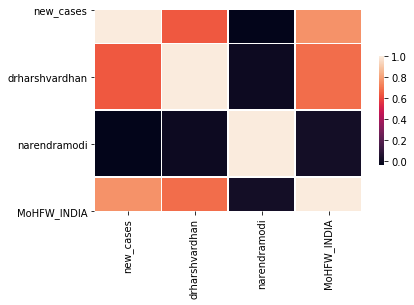

In [433]:
sns.heatmap(in_corr.corr(), square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('in_heatmap.jpg')

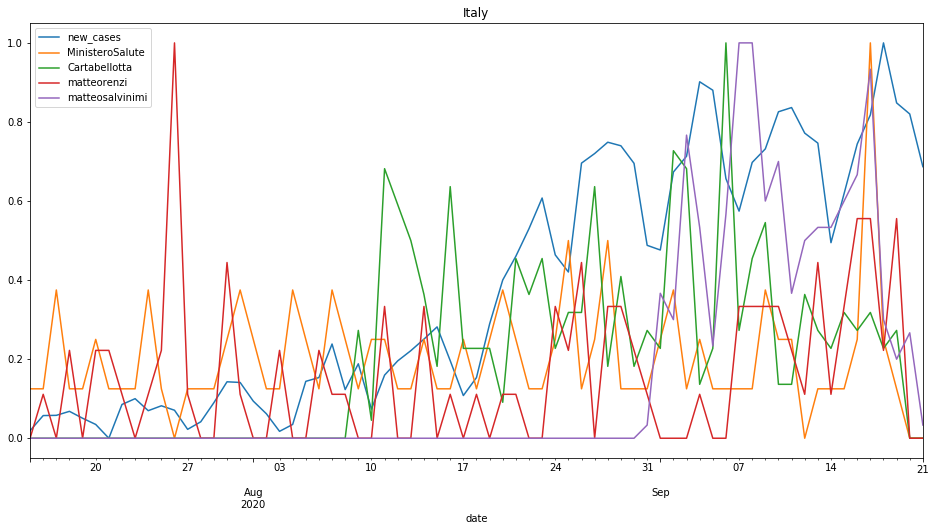

In [434]:
it_corr.plot(figsize=(16,8), title='Italy')
plt.savefig('it_curve.jpg')

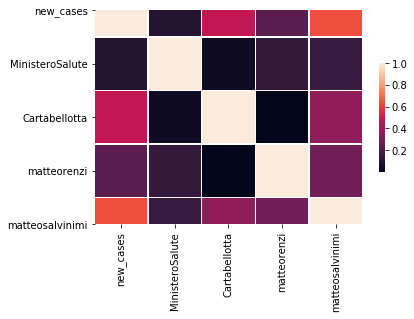

In [435]:
sns.heatmap(it_corr.corr(), square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('it_heatmap.jpg')

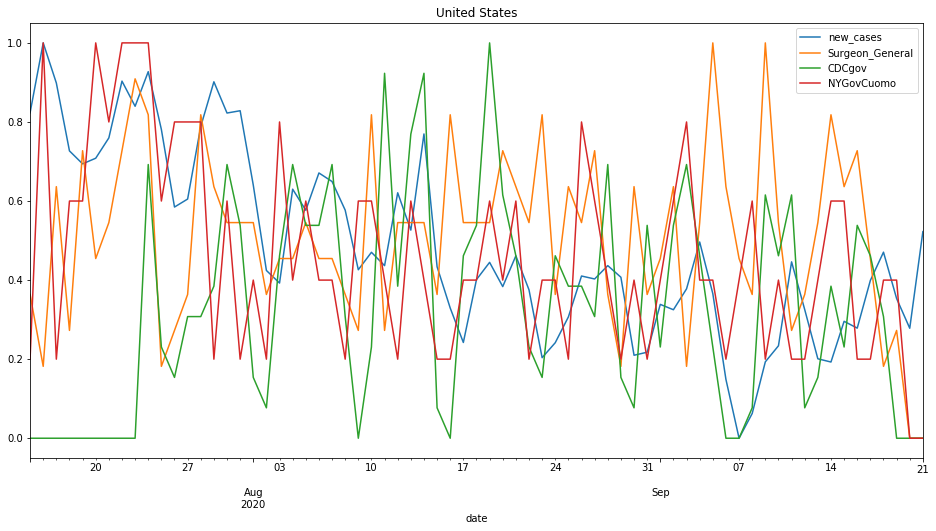

In [436]:
us_corr.plot(figsize=(16,8), title='United States')
plt.savefig('us_curve.jpg')

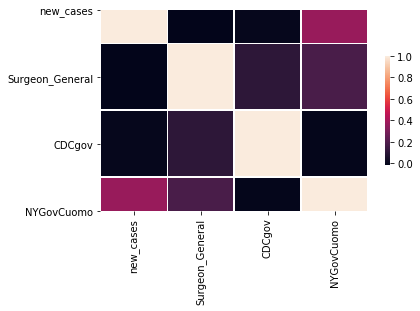

In [437]:
sns.heatmap(us_corr.corr(), square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('us_heatmap.jpg')

# All POI tweets

In [449]:
for c, cv in poi_tweet_date_count.items():
    for p, v in cv.items():
        tmp = []
        for d, t in v.items():
            tmp = tmp+t
        print(p, len(tmp))

Surgeon_General 800
CDCgov 800
NYGovCuomo 800
MoHFW_INDIA 800
drharshvardhan 800
narendramodi 800
MinisteroSalute 800
Cartabellotta 800
matteorenzi 800
matteosalvinimi 1600


# Influencer score

In [669]:
for i in all_data:
    if i['poi_name']=='narendramodi':
        break

In [614]:
tweet_influencer_score = {}

In [623]:
for i in all_data:
    follower = i['user']['followers_count']
    activity = i['user']['statuses_count']
    fav = i.get('favorite_count', 0)
    retweet = i.get('retweet_count')
    tweet_influencer_score[i['id']] = [follower, activity, fav, retweet]

In [628]:
infdf = pd.DataFrame.from_dict(tweet_influencer_score).transpose()
infdf.columns = ['fol', 'ac', 'fav', 'rt']

In [645]:
def scalerfn(df, att):
    scaler = preprocessing.MinMaxScaler()
    df[att] = scaler.fit_transform(df[att].values.reshape(-1,1))
    
for c in ['fol', 'ac', 'fav', 'rt']:
    scalerfn(infdf, c)

In [664]:
infdf['score'] = (0.3*(infdf.fol)) + (0.05*infdf.ac) + (0.15*infdf.fav) + (0.5*(infdf.rt))

In [667]:
infdf.to_csv('influencer_score.csv')

In [686]:
infd = infdf.transpose().to_dict()

In [694]:
for ix in range(len(all_data)):
    idd = all_data[ix]['id']
    all_data[ix]['inf_score'] = infd[idd]['score']

In [697]:
for each in all_data:
    with open('index_final_tweet_data.json', 'a') as fopen:
        json.dump(each, fopen)

In [698]:
for each in all_data:
    with open('index_final_tweet_data_newline.json', 'a') as fopen:
        json.dump(each, fopen)
        fopen.write('\n')

In [ ]:
"color'='"

1307216873193222149

In [720]:
with open('IR/index_final_tweet_data.json', 'r') as fopen:
    allt = fopen.read()

In [721]:
allt = allt.replace('color": "', 'color": "#')

In [722]:
with open('IR/index_final_tweet_data.json', 'w') as fopen:
    fopen.write(allt)

In [718]:
for i in allt.split('\n'):
    if '1307216873193222149' in i:
        break

# Backend stuff

In [5]:
import json
import requests

In [17]:
r = requests.get('http://3.85.190.84:5000/get_results', params={'q': 'covid', 'filter_poi': ['narendramodi'], 'filter_country': ['india', 'usa'], 'filter_lang': ['en'], 'sort_inf': 'yes'})

In [18]:
# r = requests.get('http://127.0.0.1:5000/get_results', params={'q': 'covid', 'filter_poi': ['narendramodi'], 'filter_country': ['india', 'usa'], 'sort_inf': 'yes'})

In [ ]:
json.loads(r.content)

In [598]:
r = requests.get('http://54.172.114.137:5000/get_results', params={'q': 'covid'})